# Load saved model

In [1]:
from keras.models import load_model

# skin model
model = load_model(r"/content/drive/MyDrive/Colab Notebooks/Graduation Project/Skin Model/Skin_CNN_Architecture/ CNN Architecture 50 Epoch.h5")


# Predict new image

In [70]:
from keras.utils import load_img, img_to_array

#img = load_img(r'/content/denise-jans-laoBHO09sU0-unsplash.jpg', target_size=(128, 128))

img = load_img(r'/content/drive/MyDrive/Graduation Project DataSet/LGP(R)/train/Abnormal/GettyImages-12285780531-thumb-1-_jpg.rf.5485a47c3ff09a4ab9b0aa6dc828d5f6.jpg', target_size=(128, 128))

In [71]:
img.size

(128, 128)

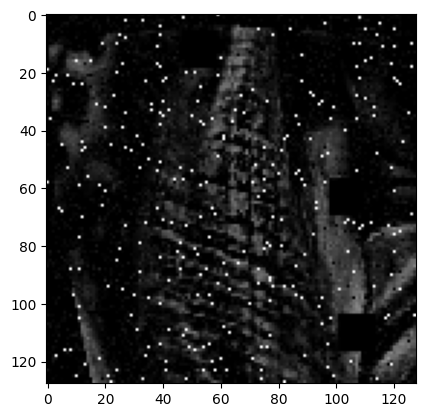

In [72]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [73]:
# convert image to array
img_array = img_to_array(img)
img_array.shape

(128, 128, 3)

In [74]:
# extend image array shape (1, 200, 200, 3)
img_array = img_array.reshape(1, 128, 128, 3)
img_array.shape

(1, 128, 128, 3)

In [75]:
prediction_prob = model.predict(img_array)
prediction_prob

1/1 [==============================] - 0s 18ms/step


array([[4.867495e-10, 1.000000e+00]], dtype=float32)

In [76]:
prediction_prob.max()


1.0

In [77]:
threshold = 0.8

def classify_input(input):

  y_prob = model.predict(input)

  if y_prob.max() < threshold:
    return 'Unknown Class'

  else:
    # y_pred = np.argmax(y_prob)
    # return classes[y_pred]
    return 'Allergy'

In [78]:
prediction_prob.argmax()

1

In [ ]:
predicted_label = classify_input(img_array)
predicted_label

In [ ]:
thresold = 0.5

classes = {
    0: 'Allergy',
    1: 'Bacteria'
}

def classify_input(input):
  y_prob = model.predict(input)

  if y_prob.all() < thresold:
    return 'Unknown Class'

  else:
    y_pred = np.argmax(y_prob)
    return classes[y_pred]



In [ ]:
predicted_label = classify_input(img_array)
predicted_label

1/1 [==============================] - 0s 22ms/step


'Bacteria'

In [ ]:
# # Sigmoid
# # predict unknown Class

# threshold = 0.5  # define threshold

# # During inference, classify inputs based on the predicted probability
# def classify_input(input):
#   y_pred = model.predict(input)


#   if y_pred <= threshold + 0.4:     # pred less than threshod
#     return 'Allergy'
#   elif y_pred >= threshold + 0.4:   # pred greater than threshod
#     return 'Bacteria'
#   else:
#     return 'Unknown'

In [ ]:
predicted_label = classify_input(img_array)
predicted_label

1/1 [==============================] - 0s 18ms/step


'Allergy'

# Confusion matrix for models


In [ ]:
# load_model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Graduation Project/SAVED_MODELS/Skin_training/VGG_16_weights_model.h5')


# Reading images
train_dir = '/content/drive/MyDrive/Graduation Project DataSet/Skin Diseases/base_dir/Skin_Diseases/train'
validation_dir = '/content/drive/MyDrive/Graduation Project DataSet/Skin Diseases/base_dir/Skin_Diseases/validation'


# ImageDataGenerator as DataAugmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='binary')


# model.evaluate
print('Model Performace \n', model.evaluate(validation_generator))

# model.predict
import numpy as np
y_test = validation_generator.labels      # Actual classes
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).flatten().astype('int32')    # predict classes


Found 70 images belonging to 2 classes.
7/7 [==============================] - 32s 5s/step - loss: 1.3025 - acc: 0.8143
Model Performace 
 [1.3024983406066895, 0.8142856955528259]
7/7 [==============================] - 8s 1s/step


In [ ]:
print('y_actual: ', y_test)
print('---------------------------------------------------------------')
print('y_pred: ', y_pred)

y_actual:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
---------------------------------------------------------------
y_pred:  [1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]


[[11 24]
 [13 22]]


(array([0, 1]), [Text(0, 0, 'Allergy'), Text(0, 1, 'Bacteria')])

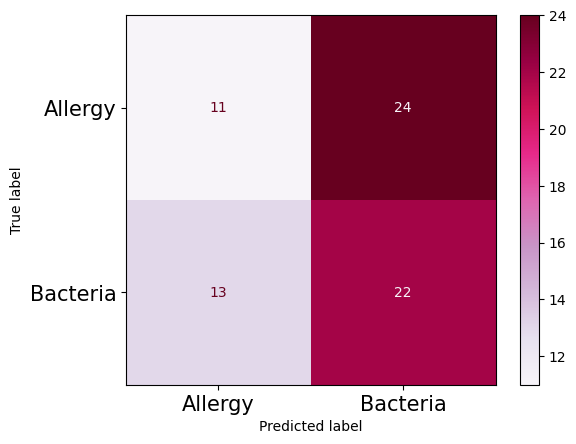

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

c_m = confusion_matrix(y_test, y_pred)
print(c_m)

# Implementing visualization of Confusion Matrix
import matplotlib.pyplot as plt

classes = ['Allergy', 'Bacteria']
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=classes)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='PuRd')
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


In [ ]:
# some visualization
from keras.utils import load_img, img_to_array

plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(validation_generator.classes),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(load_img(validation_generator.filepaths[i], target_size=(200, 200)))
    plt.axis('off')
    plt.title(classes[np.round(y_pred[i])])

Output hidden; open in https://colab.research.google.com to view.